In [1]:
#general import 

import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp 
import MyTicToc as mt

%matplotlib inline

,datetime,rain_station,pEV,temp
0,2003-01-01,0.0160,0.0000,3.1
1,2003-01-02,0.0253,0.0000,7.3
2,2003-01-03,0.0001,0.0001,2.8
3,2003-01-04,0.0000,0.0002,-2.0
4,2003-01-05,0.0022,0.0003,-1.3
...,...,...,...,...
6205,2019-12-28,0.0000,0.0002,1.4
6206,2019-12-29,0.0000,0.0002,1.9
6207,2019-12-30,0.0000,0.0004,5.2
6208,2019-12-31,0.0000,0.0003,3.4


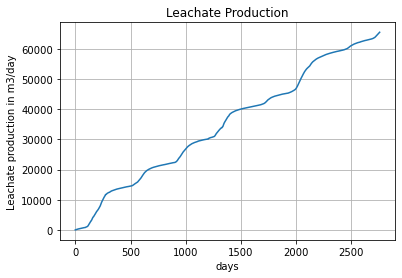

In [36]:
import pandas as pd

wieringermeer_meteo = pd.read_excel ('WieringermeerData_Meteo.xlsx')
wieringermeer_leachate = pd.read_excel('WieringermeerData_LeachateProduction.xlsx')

plt.plot(wieringermeer_leachate.Leachate)
plt.xlabel("days")
plt.ylabel("Leachate production in m3/day")
plt.title("Leachate Production")
plt.grid()


display(wieringermeer_meteo)

In [2]:
#timer function [from lotka volterra example]
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print ("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print ("Toc: start time not set")

In [19]:
# Definition of Rate Equation
#equations from the landfilll water balance file 
#we want to solve the equation for rabbits and foxes. The amount of rabbits and foxes are saved in an array. And the function is defined below. 

def dYdt(t, Y):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ J - L_cl - E ,
                     (1 - beta) * L_cl - L_wd])
def L_cl() : 
    return(a * ((S_cl - S_clmin) / (S_clmax - S_clmin)))

def L_wb(): 
    return (a * ((S_wb - S_wbmin) / (S_wbmax - S_wbmin)) ** b_wb) 

def E(): 
    return (pEv * C_f * f_red)

def beta(): 
    return (beta_0 * ((S_cl - S_clmin) / (S_clmax - S_clmin)))

In [41]:
#set the parameters

J = wieringermeer_meteo.rain_station 
E = wieringermeer_meteo.pEV